In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import LinearRegression
import math
# Step 2: Enable interactive mode for Jupyter Notebook
%matplotlib inline
#np.set_printoptions(formatter={'float_kind': lambda x: f"{x:0.6f}"})
np.set_printoptions(precision=6)

# 1. Load, scale and display data

In [2]:
df = pd.read_excel('data1.xlsx')

In [3]:
df

,x1,x2,y,Notes
0,0.650114,0.681526,-3.606063e-03,Remove it or normalize it?
1,0.410437,0.147554,-2.159249e-54,NaN
2,0.312691,0.078723,-2.089093e-91,NaN
3,0.840353,0.264732,3.341771e-124,NaN
4,0.082507,0.403488,3.606771e-81,NaN
5,0.319404,0.762959,1.322677e-79,NaN
6,0.883890,0.582254,6.229856e-48,NaN
7,0.574329,0.879898,1.033078e-46,NaN
8,0.683418,0.861057,2.535001e-40,NaN
9,0.731024,0.733000,7.710875e-16,NaN


In [4]:
df = df.drop(columns=['Notes'])
df = df.dropna()

In [5]:
df

,x1,x2,y
0,0.650114,0.681526,-3.606063e-03
1,0.410437,0.147554,-2.159249e-54
2,0.312691,0.078723,-2.089093e-91
3,0.840353,0.264732,3.341771e-124
4,0.082507,0.403488,3.606771e-81
5,0.319404,0.762959,1.322677e-79
6,0.883890,0.582254,6.229856e-48
7,0.574329,0.879898,1.033078e-46
8,0.683418,0.861057,2.535001e-40
9,0.731024,0.733000,7.710875e-16


In [6]:
# Take the odd root of y to reserve sign and make scale better for work:
for i, x in enumerate(df['y']): 
    df.iloc[i,2] = 10*math.copysign(abs(x) ** (1./9.), x)

In [7]:
# Scaled y without notes 
df

,x1,x2,y
0,0.650114,0.681526,-5.352532e+00
1,0.410437,0.147554,-1.089293e-05
2,0.312691,0.078723,-8.403104e-10
3,0.840353,0.264732,1.907400e-13
4,0.082507,0.403488,1.153193e-08
5,0.319404,0.762959,1.720747e-08
6,0.883890,0.582254,5.687770e-05
7,0.574329,0.879898,7.770684e-05
8,0.683418,0.861057,3.985126e-04
9,0.731024,0.733000,2.093097e-01


# 2. Visualise data on plots

In [8]:
# pick the highest points in top_2_indices to make their color in red in plots...
top_2_indices = df['y'].nlargest(3).index
top_qntl_index = df['y'].nlargest(int(df.shape[0]/3.0)).index
colors = np.full(df.shape[0], 'b', dtype=object)  # Default color is blue
colors[top_qntl_index] = 'y'# display the top qualtize as yellow
colors[top_2_indices] = 'r'  # Color the top 3 point as red to use it for gradient

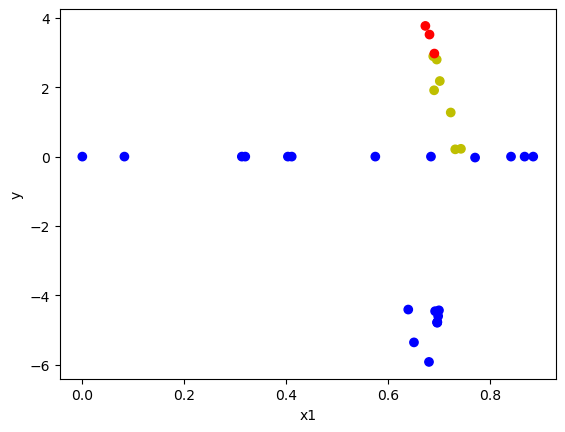

In [9]:
plt.scatter(df['x1'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x1')
plt.show()

Text(0.5, 0, 'x2')

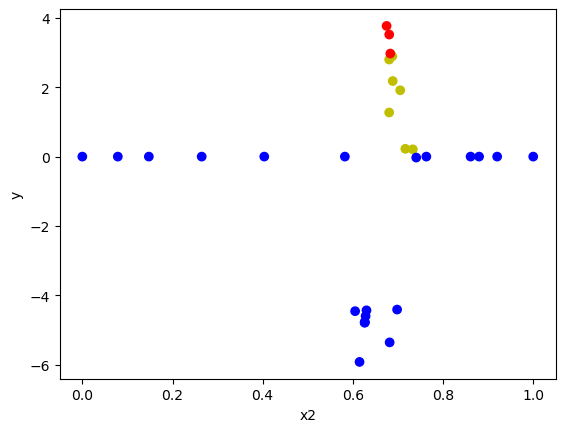

In [10]:
plt.scatter(df['x2'],df['y'], c = colors)
# Highlight the two highest y values
plt.ylabel('y')
plt.xlabel('x2')

# You can rotate 2 dimentional values

<IPython.core.display.Javascript object>


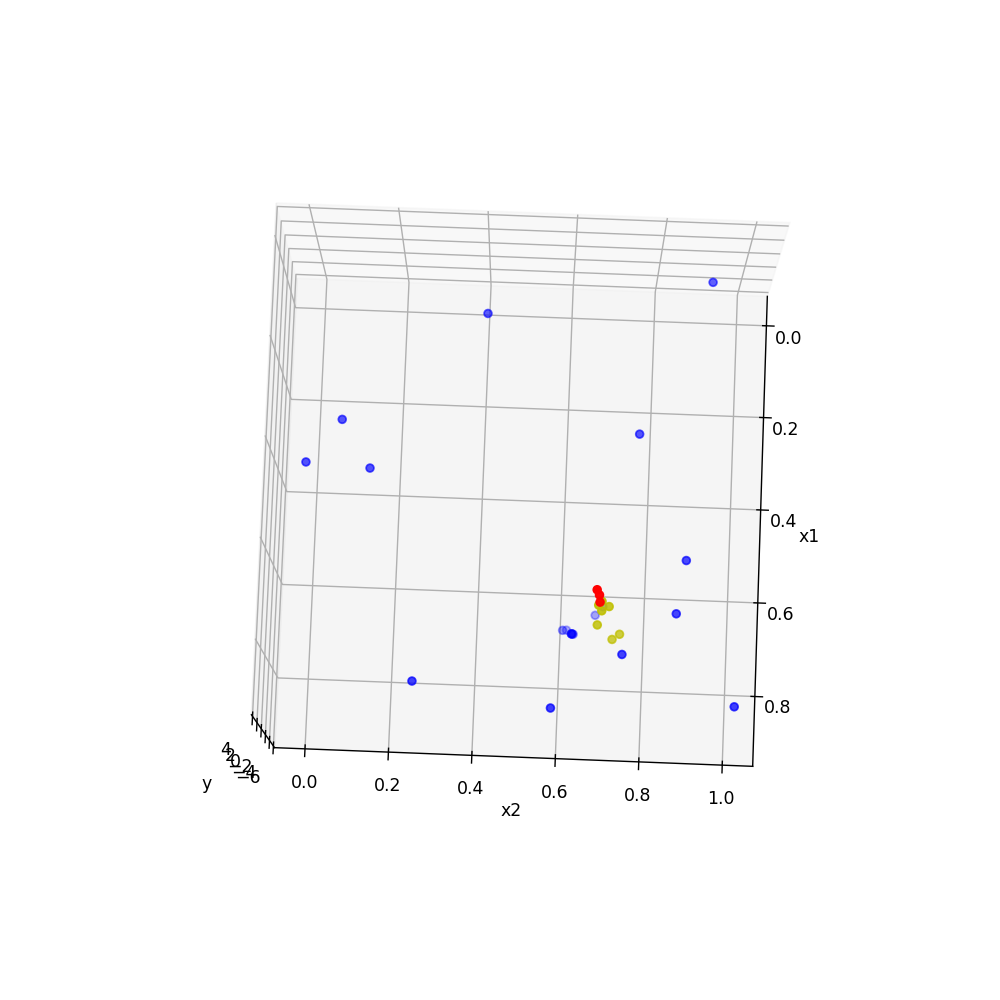

In [65]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.scatter(df['x1'], df['x2'], df['y'], c = colors)
# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
# Display the plot
plt.show()

In [12]:
# do not forget to switch the previous grid off (: otherwise you can get error with s...
%matplotlib inline

# 3. Build the grid for Optimization
fine tune the size of grid for high dimention!

In [13]:
x = np.linspace(0,1,1001).reshape(-1,1)

In [14]:
x_grid = np.array([[x1, x2] for x1 in x for x2 in x])

In [15]:
x_grid = x_grid.squeeze()

In [16]:
# Prepare X and y for optimization tools
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy().reshape(-1,1)

# 4. Use Gaussian Process Regressor with Radial Based Function 

In [17]:
# Define the kernel, scale = 1/4 and bounds was chosed after probe testing
kernel = RBF(length_scale=0.025, length_scale_bounds=(1E-3, 1E1))

In [18]:
# Apply workaround with custom optmizer to get rid of max_iter warning
from scipy.optimize import fmin_l_bfgs_b

# Custom optimizer with maxiter set
def custom_optimizer(obj_func, initial_theta, bounds):
    optimized_result = fmin_l_bfgs_b(
        obj_func,
        initial_theta,
        bounds=bounds,
        maxiter=10000  # Increase maxiter as needed
    )
    # fmin_l_bfgs_b returns (optimized_params, min_value, info_dict)
    return optimized_result[0], optimized_result[1]

# Create the GaussianProcessRegressor with the custom optimizer
bo_model = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-15,
    n_restarts_optimizer=2000,
    normalize_y=True,
    optimizer=custom_optimizer
)

In [19]:
bo_model.fit(X, y)

GaussianProcessRegressor(alpha=1e-15, kernel=RBF(length_scale=0.025),
                         n_restarts_optimizer=2000, normalize_y=True,
                         optimizer=<function custom_optimizer at 0x0000012D4B7F0790>)

In [20]:
# Just to check that predicted values are equal originals - this can be disabled
print(np.column_stack( (y,bo_model.predict(X))) )

[[-5.352532e+00 -5.352532e+00]
 [-1.089293e-05 -1.089293e-05]
 [-8.403104e-10 -8.403113e-10]
 [ 1.907400e-13  1.900702e-13]
 [ 1.153193e-08  1.153193e-08]
 [ 1.720747e-08  1.720747e-08]
 [ 5.687770e-05  5.687770e-05]
 [ 7.770684e-05  7.770684e-05]
 [ 3.985126e-04  3.985126e-04]
 [ 2.093097e-01  2.093097e-01]
 [-1.036588e-32 -6.661338e-16]
 [-1.590523e-13 -1.598721e-13]
 [ 1.910308e+00  1.910308e+00]
 [ 9.322166e-15  8.659740e-15]
 [ 2.177019e+00  2.177019e+00]
 [ 2.243137e-01  2.243137e-01]
 [-4.406660e+00 -4.406660e+00]
 [-4.764796e+00 -4.764796e+00]
 [ 2.795897e+00  2.795897e+00]
 [-4.453105e+00 -4.453105e+00]
 [-5.915363e+00 -5.915363e+00]
 [-4.428998e+00 -4.428998e+00]
 [-4.595122e+00 -4.595122e+00]
 [-4.787070e+00 -4.787070e+00]
 [-4.773235e+00 -4.773235e+00]
 [ 2.890638e+00  2.890638e+00]
 [-2.774585e-02 -2.774585e-02]
 [ 2.968429e+00  2.968429e+00]
 [ 3.515669e+00  3.515669e+00]
 [ 1.270650e+00  1.270650e+00]
 [ 3.764668e+00  3.764668e+00]]


In [21]:
# check the scale parameter
kr = bo_model.kernel_
kr.length_scale

0.019635157226006106

In [22]:
# Predict points on the grid
post_mean, post_std = bo_model.predict(x_grid,return_std=True)

In [23]:
# Define aquiring function, you can change 2 to 1 or 0 depends upon the strategy 
a_fun = post_mean + 1 * post_std # I choose 1 std as previous results show it is best strategy
#a_fun = post_mean

In [24]:
# Find the index and maximum value of acquiring function
i = np.argmax(a_fun)
print('The maximum of acquiring function is', a_fun[i],'the max index is',i)
print('post_mean =', post_mean[i],' post_std =', post_std[i])
print('the next point for Bayesian Optimization is',x_grid[i])

The maximum of acquiring function is 5.292064134112131 the max index is 675337
post_mean = 4.315320444772006  post_std = 0.9767436893401253
the next point for Bayesian Optimization is [0.674 0.663]


In [25]:
# I would like to find out the points even better than grid
# I use optimize.minimize function over bayesian predictor
# This piece of code is useful for multi-dimentions
from scipy.optimize import minimize
def aquisition_fun(x):
    x = np.atleast_2d(x)
    post_mean, post_std = bo_model.predict(x, return_std=True)
    return -(post_mean + 1 * post_std)
result = minimize(aquisition_fun, x_grid[i], bounds=[(0, 0.999999)]*2, tol=1e-12)
optimal_point = result.x
optimal_value = -result.fun
print(f"Optimal value {optimal_value:0.6f}")
print("at point", optimal_point)

Optimal value 5.293615
at point [0.674399 0.663127]


In [26]:
# The current max index
max_index = top_2_indices[0]

In [27]:
# The current max point
X[max_index]

array([0.672459, 0.674786])

In [28]:
# The length of step from current max point to the new point
np.linalg.norm(X[max_index]-optimal_point)

0.011819799716761635

# 5. Find the next point based on linear gradient from max point

In [80]:
# Find the maximum value in y and its index
max_index = top_2_indices[0]
max_value = y[max_index]
print("Some analytics for hyperplain:")
print('max value =', max_value)
# Calculate distances from the point with maximum y to all other points
distances = np.linalg.norm(X - X[max_index], axis=1)
closest_indices = np.argsort(distances)[1:5] #<- To fine tune the number of points to research & build surrounding plane 
indices_to_use = np.concatenate(([max_index], closest_indices))
# Show average distance of closest points. Step should not be far away
mean_dist = distances[indices_to_use].mean()
print("Average distance",mean_dist)
# Extract the points and their corresponding y values
X_selected = X[indices_to_use]
y_selected = y[indices_to_use]
# Fit a linear hyperplane using the selected points
l2_model = LinearRegression()
l2_model.fit(X_selected, y_selected, sample_weight = 4/(1 + 4 * distances[indices_to_use]/mean_dist))
# Coefficients of the linear hyperplane
coefficients = l2_model.coef_
intercept = l2_model.intercept_
# Calculate the covariance matrix of the feature matrix X
cov_matrix = np.cov(X_selected, rowvar=False)
# Calculate the determinant of the covariance matrix
det_cov_matrix = np.linalg.det(cov_matrix)
print("Determinant of the covariance matrix should not be 0:", det_cov_matrix)
# Define the maximum point
max_point = X[max_index]
# Calculate the gradient of the hyperplane
gradient = coefficients
# THIS IS IMPORTANT
# Define the distance to move along the gradient direction depends on surroundings and predicted value
distance = 0.007 # <- To fine tune the distance
# Normalize the gradient to unit length
gradient_unit = gradient / np.linalg.norm(gradient)
# Move from the maximum point in the direction of the gradient by the specified distance
highest_point_on_hyperplane = np.clip(max_point + distance * gradient_unit, 0, 0.999999)
# Calculate the y value at this highest point
highest_y_value_on_hyperplane = l2_model.predict(highest_point_on_hyperplane)[0]
print("X selected points, Y selected,Y predicted, Distance from max")
print(np.column_stack( (X_selected, y_selected, l2_model.predict(X_selected), distances[indices_to_use])))
print("Highest point on hyperplane within",distance,"distance:", highest_point_on_hyperplane)
print("Highest y value on hyperplane within",distance,"distance:", highest_y_value_on_hyperplane)
print("Gradient",gradient)
point1 = highest_point_on_hyperplane

Some analytics for hyperplain:
max value = [3.764668]
Average distance 0.014471838472544551
Determinant of the covariance matrix should not be 0: 9.434656684742124e-10
X selected points, Y selected,Y predicted, Distance from max
[[0.672459 0.674786 3.764668 3.78295  0.      ]
 [0.680578 0.680623 3.515669 3.379101 0.009999]
 [0.690098 0.683035 2.968429 2.964703 0.019473]
 [0.687893 0.687441 2.890638 2.994441 0.019959]
 [0.694679 0.680441 2.795897 2.815394 0.022928]]
Highest point on hyperplane within 0.007 distance: [[0.665816 0.672578]]
Highest y value on hyperplane within 0.007 distance: [4.079105]
Gradient [[-40.148596 -13.343054]]


In [81]:
# Check the model score, it should be close to 1
l2_model.score(X_selected, y_selected)

0.9587092964271041

In [82]:
# Check the distance from max point. It should not be far away
np.linalg.norm(highest_point_on_hyperplane - max_point)

0.006999999999999967

In [83]:
# See covariance matrix to control multicolinearity
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[7.619322e-05 2.575176e-05]
 [2.575176e-05 2.108611e-05]]


In [77]:
# Check what Bayesian think about this point
bo_model.predict(highest_point_on_hyperplane)

array([3.061641])

In [78]:
#weights of points
4/(1 + 4 * distances[indices_to_use]/mean_dist)

array([4.      , 1.062746, 0.626744, 0.613816, 0.545155])

In [79]:
# Do prinicple components analysis of data seleted for plain surface to double check multicol.
from sklearn.decomposition import KernelPCA, PCA
pca = PCA(n_components = 2)
X_lin = pca.fit(X_selected)
X_lin.explained_variance_ratio_

array([0.887688, 0.112312])